# Explorando vision


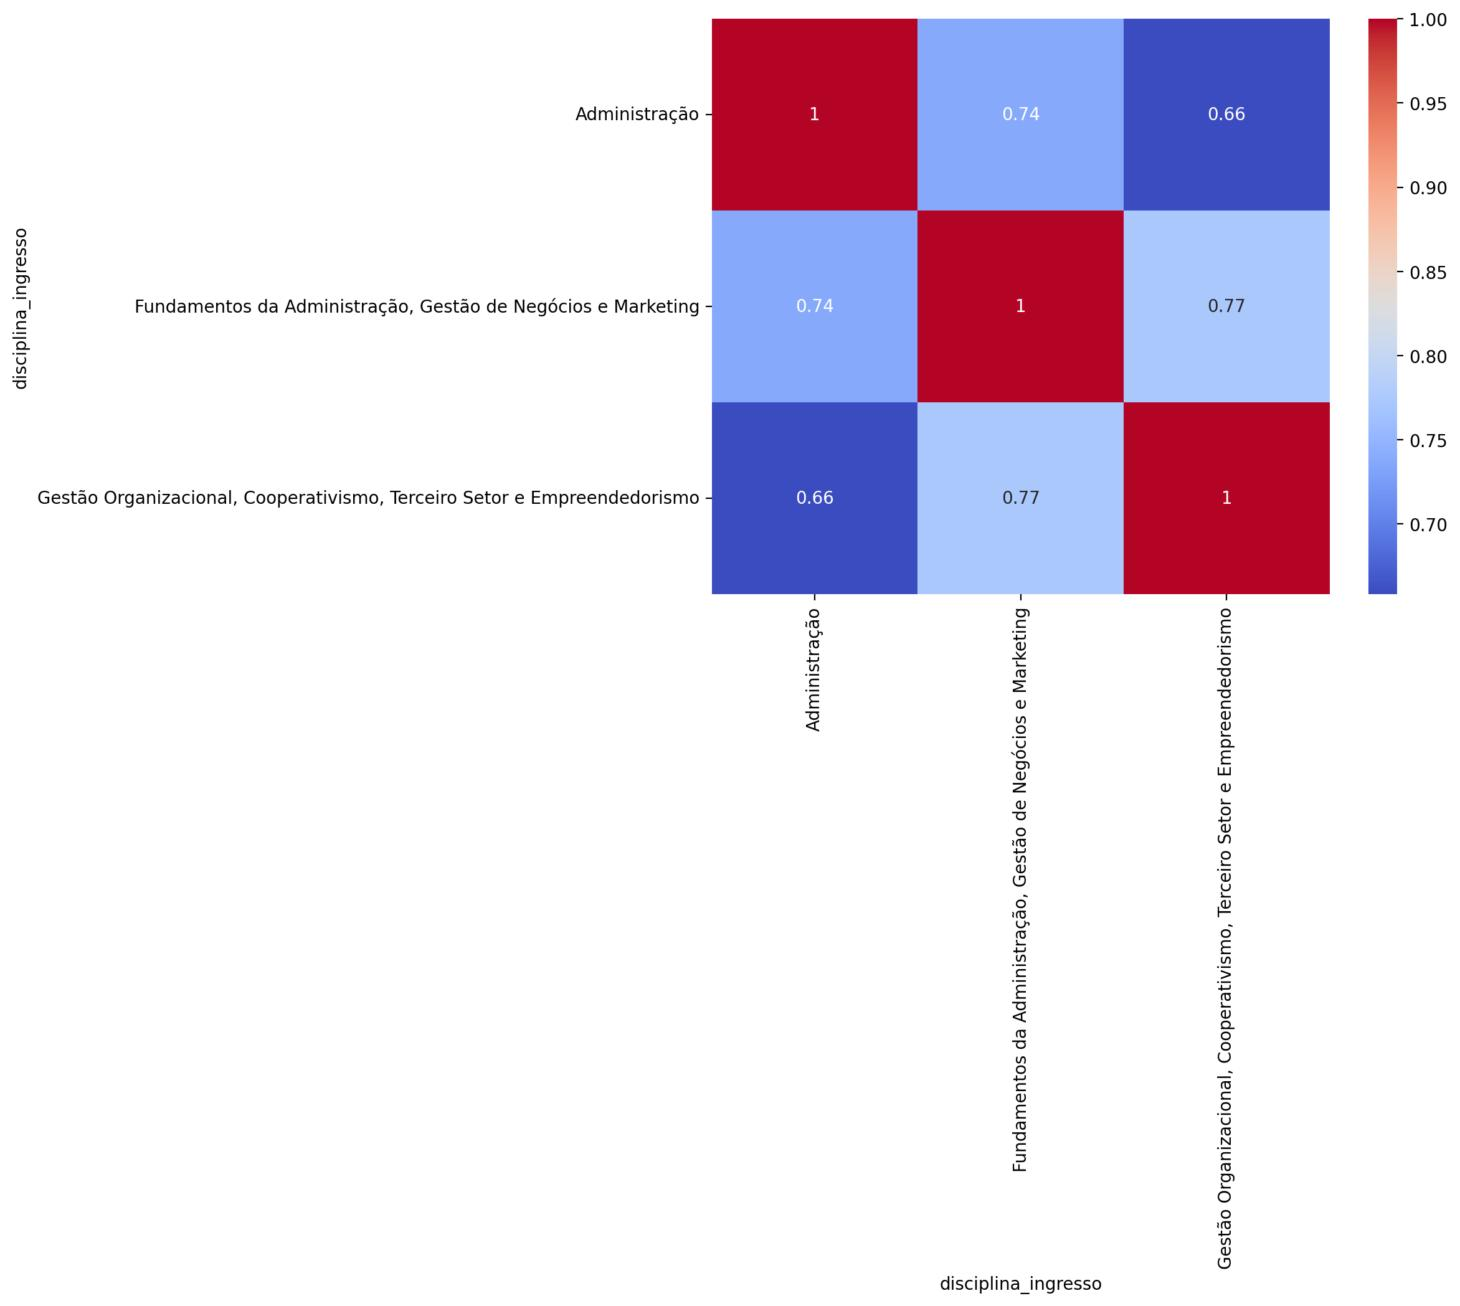

In [22]:
#https://python.langchain.com/docs/integrations/llms/ollama/
#https://python.langchain.com/docs/integrations/chat/ollama/#multi-modal

import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


# def convert_to_base64(pil_image):
#     """
#     Convert PIL images to Base64 encoded strings

#     :param pil_image: PIL image
#     :return: Re-sized Base64 string
#     """

#     buffered = BytesIO()
#     pil_image.save(buffered, format="JPEG")  # You can change the format if needed
#     img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
#     return img_str

def convert_to_base64(pil_image):
    pil_image = pil_image.convert("RGB")  # Converte RGBA → RGB
    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = '/Users/tmedeirosb/Desktop/DEV/TSI/tsi-llm/data/grafico.png'
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [23]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2-vision:latest")

def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]


from langchain_core.output_parsers import StrOutputParser

chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(
    {"text": "Descreva essa imagem em português-br", "image": image_b64}
)

print(query_chain)

A imagem mostra uma matriz de correlação entre disciplinas ingresso e disciplinas do curso, com cores que indicam os níveis de correlação. 
As disciplinas ingresso são: Administração (Administração) e Gestão Organizacional, Cooperativismo, Terceiro Setor e Empreendedorismo (Gestão Organizacional). 

As disciplinas do curso são:

*   Fundamentos da Administração, Gestão de Negócios e Marketing (Fundamentos da Administração);
*   Fundamentos da Administração, Gestão de Negócios e Marketing (Administração);
*   Gestão Organizacional, Cooperativismo, Terceiro Setor e Empreendedorismo (Gestão Organizacional).

A matriz tem uma estrutura quadrada, com as disciplinas ingresso no eixo x e as disciplinas do curso no eixo y. Cada célula da matriz representa a correlação entre as disciplinas ingresso e o curso. 

As cores utilizadas na matriz são:
*   Vermelho: indica uma correlação alta (acima de 0,7);
*   Azul: indica uma correlação baixa (abaixo de 0,3).


In [21]:
from ollama import Client

client = Client(host="http://localhost:11434")

response = client.chat(
    model="llama3.2-vision:latest",
    messages=[
        {
            "role": "user",
            "content": "Descreva essa imagem em português-br",
            "images": ["/Users/tmedeirosb/Desktop/DEV/TSI/tsi-llm/data/grafico.png"],
        }
    ],
)

print(response['message']['content'])

A imagem apresenta uma matriz de correlação, também conhecida como "matriz de covação", que mede a relação entre os resultados das disciplinas ingresso e os cursos. A matriz é composta por linhas e colunas, sendo cada linha representada por uma disciplina ingênua e cada coluna representada por um curso.

A matriz é dividida em quatro quadrantes: superior esquerdo, inferior direito, inferior esquerdo e superior direito. O quadrante superior esquerdo representa a correlação entre as disciplinas ingresso e os cursos, enquanto o quadrante inferior direito representa a correlação entre os cursos e a disciplina ingênua.

O valor da matriz de correlação é representado pela cor, com valores mais altos indicando uma maior correlação. Os valores na matriz são normalizados para que eles sejam comparáveis à escala 0-1. 

Os resultados mostram que as disciplinas ingresso têm uma forte correlação com os cursos, especialmente em Administração e Gestão Organizacional, Cooperativismo, Terceiro Setor e 